In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from konlpy.tag import Hannanum
from konlpy.tag import Okt
from konlpy.tag import Komoran
import sqlite3 as sq3
from pandas.io import sql
import os
import numpy as np
import math

## read db file

In [2]:
# 데이터베이스 저장
def db_save(data, db_name, table_name):
    with sq3.connect(os.path.join('.',db_name)) as con: # sqlite DB 파일이 존재하지 않는 경우 파일생성
        try:
            data.to_sql(name = table_name, con = con, index = False, if_exists='replace') 
            #if_exists : {'fail', 'replace', 'append'} default : fail
        except Exception as e:
            print(str(e))
        print(len(data), '건 저장완료..')

In [2]:
# 데이터베이스 불러오기
def db_select(db_name, table_name):
    with sq3.connect(db_name) as con: 
        try:
            query = 'SELECT * FROM {}'.format(table_name)
            df = pd.read_sql(query, con = con)
        except Exception as e:
            print(str(e)) 
        return df  

In [4]:
def word_tokens(string):

    tokens_const = []

    for i in string.split(','):
        tokens_const.append(i)

    # 단어별 빈도를 담을 딕셔너리 생성하고, 빈도 계산
    const_word_count = dict()
    for word in tokens_const:
        const_word_count[word] = const_word_count.get(word, 0) + 1

    # 빈도를 key로 하여 단어를 빈도 역순으로 정렬
    sorted_word_count = sorted(const_word_count, key=const_word_count.get, reverse=True)

    n = sorted_word_count[:] # 빈도수 단어를 추출
    w = [const_word_count[key] for key in n] # 단어에 대한 빈도

    full_list = []

    for i in n,w:
        full_list.append(i)

    return full_list

# save word tokens into a file

In [3]:
DB_NAME = '법무법인_세종_뉴스레터.db'
TABLE_NAME = '뉴스레터_토큰화'
df = db_select(DB_NAME,TABLE_NAME)

In [6]:
temp_df = df.copy()

strings_t = []
strings_c = []

for i in temp_df.iloc[:,4]:
    string_token = ""
    string_count = ""
    
    token_set = word_tokens(i)
    string_token = ",".join(token_set[0])
    
    n = map(str,token_set[1])
    n = list(n)
    string_count = ",".join(n)

    strings_t.append(string_token)
    strings_c.append(string_count)
    
temp_df['tokens'] = strings_t
temp_df['counts'] = strings_c

temp_df.iloc[:,[0,5,6]]

,제목,tokens,counts
0,Policy and Law Report_Vol.153 – 정부 주요 정책 및 입법정...,"동향,국회,정책,법안,입법,도움,세종,입법전략자문팀Legislative,레터,정부,...","5,5,4,4,3,3,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,..."
1,순환자원으로 인정받을 수 있는 폐기물의 범위가 확대됩니다 - ‘자원순환기본법 시행령...,"순환자원,인정,시행령,폐기물,요건,개정안,가능,활용,자원순환기본법,규제,충족,완화,...","23,17,13,12,10,9,6,5,4,4,4,3,3,3,3,3,3,2,2,2,2..."
2,상속세 및 증여세법상 성실공익법인의 요건으로 전용계좌의 신고의무는 포함되지 않는다는...,"전용계좌,성실공익법인,개설,상증세법,요건,사용,원고,원칙,해석,특수관계,주식,가산세...","10,9,7,7,6,6,4,4,4,3,3,3,3,3,3,2,2,2,2,2,2,2,2..."
3,검사의 수사개시 범위 관련 개정 대통령령(2022.9.10.자)의 주요 내용,"범죄,개정,검사,대통령령,수사개시,수사,시행,경제범죄,개시,부패범죄,가능,검찰청법,...","30,23,21,17,16,14,12,11,10,10,10,9,9,9,8,7,5,5..."
4,Policy and Law Report_Vol.152 – 정부 주요 정책 및 입법정...,"동향,국회,정책,법안,입법,도움,세종,입법전략자문팀Legislative,레터,정부,...","5,5,4,4,3,3,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,..."
...,...,...,...
903,상해에서 적격 외국유한파트너(QFLP)제도 시범실시,"중국,상해시,실시방법,사모펀드,경외,투자자,투자,위안화,상해,조건,관리,정부당국,허...","11,5,5,5,4,4,4,4,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2..."
904,소득세법상 특수관계자간 상장주식 양도시 시가,"시가,거래,가액,개인,상증세법,양도,한국거래소,최종시세가액,평가,법인세법,법인,주식...","13,12,10,9,9,8,8,7,7,7,7,7,5,5,5,5,4,4,4,4,4,4..."
905,“미네르바”법 위헌결정과 기업법무에서의 시사점,"목적,헌법재판소,기업,공익,행위,법령,상황,금지,미네르바,무죄판결,선고,통신,검찰,...","6,5,5,4,4,4,4,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,..."
906,소위 ‘물량 몰아주기’에 관한 공정거래위원회의 심사기준 개정,"규모,지원행위,현저한,거래,지원객체,공정거래위원회,물량,부당지원행위,사건,유리한,조...","14,13,13,12,10,6,6,6,4,4,4,3,3,3,3,3,3,3,3,3,2..."


In [7]:
db_save(temp_df, DB_NAME, 'emerics_tokenized2')
#db_save_as_csv(temp_df)

908 건 저장완료..


In [4]:
df1 = db_select(DB_NAME, 'emerics_tokenized2')
df1 = df1.iloc[:,[0,4]].copy()
df1

,제목,BoW
0,Policy and Law Report_Vol.153 – 정부 주요 정책 및 입법정...,"세종,입법전략자문팀Legislative,정책,입법,동향,레터,정부,국회,접수,의안현..."
1,순환자원으로 인정받을 수 있는 폐기물의 범위가 확대됩니다 - ‘자원순환기본법 시행령...,"환경부,순환자원,인정,요건,완화,골자,자원순환기본법,시행령,시행령,개정안,입법예고,..."
2,상속세 및 증여세법상 성실공익법인의 요건으로 전용계좌의 신고의무는 포함되지 않는다는...,"서울고등법원,성실공익법인,요건,공익법인,전용계좌,개설,사용,전용계좌,지연,사안,상속..."
3,검사의 수사개시 범위 관련 개정 대통령령(2022.9.10.자)의 주요 내용,"검사,수사개시,축소,개정,형사소송법,검찰청법,시행,대통령령,검사,수사개시,범죄,개정..."
4,Policy and Law Report_Vol.152 – 정부 주요 정책 및 입법정...,"세종,입법전략자문팀Legislative,정책,입법,동향,레터,정부,국회,접수,의안현..."
...,...,...
903,상해에서 적격 외국유한파트너(QFLP)제도 시범실시,"상해시금융서비스판공실上海市金融服务办公室,상해시,정부당국,본시,외상,투자지분투자기업,..."
904,소득세법상 특수관계자간 상장주식 양도시 시가,"대법원,소득세법상,상장주식,시가,산정,판결,본건판결,사안,개요,상장법인,최대주주,개..."
905,“미네르바”법 위헌결정과 기업법무에서의 시사점,"글로벌,금융위,미네르바라,필명,인터넷,논객,화제,다음Daum,아고라,경제토론방,우리..."
906,소위 ‘물량 몰아주기’에 관한 공정거래위원회의 심사기준 개정,"공정거래위원회,부당한,지원행위,심사지침,시행,현저한,규모,거래,부당지원행위일명,물량..."


# 단어의 총 등장 횟수 구하기 --> TF

## 특정 단어를 포함하는 문서빈도 수 계산 - DF

In [11]:
df = db_select(DB_NAME,'emerics_tokenized2')

In [12]:
wordUsage = dict()     # IDF

for key in TF:
    exis = 0
    for eachRow in df1.iloc[:,1]:
        tokens_const = []
        
        for j in eachRow.split(','):
            tokens_const.append(j)

        if (str(key) in tokens_const):
            exis += 1
            
    wordUsage[key] = exis

In [13]:
wordUsage_list = sorted(wordUsage.items(), key=lambda x:x[1], reverse=True)
DF = dict(wordUsage_list)
DF

{'세종': 493,
 '법률': 333,
 '기존': 317,
 '시행': 304,
 '개정': 297,
 '국회': 281,
 '대응': 272,
 '정부': 264,
 '변경': 251,
 '도움': 250,
 '동향': 248,
 '상기': 246,
 '활용': 227,
 '법무법': 219,
 '입법': 212,
 '기준': 211,
 '공포': 208,
 '정책': 202,
 '기업': 200,
 '규제': 195,
 '한편': 195,
 '요구': 190,
 '특정': 189,
 '인정': 187,
 '판결': 185,
 '사건': 182,
 '의미': 178,
 '현황': 178,
 '시행령': 175,
 '접수': 170,
 '도입': 169,
 '제기': 168,
 '개정안': 167,
 '절차': 166,
 '주장': 165,
 '기업들': 165,
 '정보': 164,
 '강화': 162,
 '이해관계': 158,
 '파악': 157,
 '보호': 155,
 '내용': 155,
 '레터': 154,
 '정부규제': 152,
 '상담': 152,
 '법안': 149,
 '이유': 148,
 '입법안': 148,
 '보유': 147,
 '가능': 146,
 '진행': 144,
 '바탕': 144,
 '가능성': 143,
 '실무': 141,
 '근거': 140,
 '상황': 139,
 '제도': 138,
 '모니터링': 138,
 '법원': 136,
 '위반': 136,
 '선고': 134,
 '시사점': 134,
 '결과': 134,
 '운영': 133,
 '요건': 131,
 '과정': 131,
 '직결': 129,
 '선별': 129,
 '출신': 127,
 '향후': 127,
 '입법예고': 127,
 '초점': 125,
 '부담': 121,
 '목적': 121,
 '수행': 121,
 '상단': 121,
 '사용': 120,
 '부과': 120,
 '신설': 120,
 '전문성': 120,
 '대법원': 119,
 '제출': 119,

# TF-IDF
##### 참고: https://brunch.co.kr/@bflysoft1117/127, https://www.researchgate.net/publication/342833072_gujojeog_topig_modelling-eul_hwal-yonghan_gong-gongdeiteo_suyo_bunseog_Analysis_of_Open_Government_Data_Demand_Using_Structural_Topic_Modeling
높을수록 단어 중요도가 높다
### TF-IDF = TF X log(N/DF)
- TF: 문서 내 특정 단어의 빈도 수
- N: 분석 대상 문서 통합
- DF: 특정 단어를 포함하는 문서빈도 수

### Save dictionaries

In [5]:
import pickle

In [6]:
def saveDict(my_dict, file_name):
    with open(file_name, "wb") as tf:
        pickle.dump(my_dict,tf)
    print(len(my_dict),' saved to file...')

In [7]:
def readDict(file_name):
    new_dict = dict()
    with open(file_name, "rb") as tf:
        new_dict = pickle.load(tf)
    return(new_dict)

In [18]:
saveDict(DF,'DF_file.pkl')

20046  saved to file...
20046  saved to file...
20046  saved to file...


In [8]:
#DF_new = readDict('DF_file.pkl')
#print(DF_new)

{'개정': 1466.176058615755, '판결': 1166.121309732336, '회사': 1130.4168309045353, '중국': 1100.6228783449815, '개정안': 1087.0668634904735, '사건': 1063.9913517892176, '동향': 1035.6568746841763, '데이터': 1003.130595117909, '국회': 911.3353041008844, '개인정보': 901.924362351965, '정책': 891.2651719516525, '주장': 878.2289359208671, '정부': 838.7654920339295, '법안': 824.1279211310604, '시행령': 823.2292023388896, '법률': 797.4660014535752, '인정': 796.3884239203402, '상법': 739.9015209532671, '행위': 739.8438772338803, '입법': 727.3290519646404, '기준': 725.3149638272376, '대법원': 717.3386725778868, '규제': 716.8220861374966, '기업': 711.0756956650306, '시행': 698.1102400504557, '공정위': 696.3766192267475, '이사': 690.6076910135617, '지급': 689.1261962672281, '정보': 684.5511803108379, '법원': 672.1006804742955, '러시아': 648.7623185530297, '과징금': 643.5412108970793, '미국': 636.6844154763509, '기존': 636.6672758580277, '공정거래법': 625.2106691183568, '주식': 620.0752568117505, '사용': 613.197048653232, '계약': 608.724816874102, '도입': 608.6471302515156, '절차': 608.

## graph of hannanum

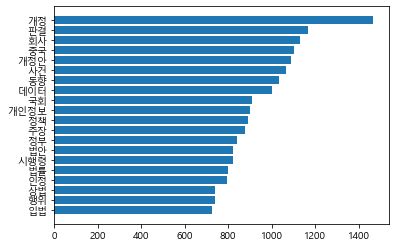

In [10]:
from matplotlib import font_manager, rc

# 그래프에서 사용할 한글 폰트를 지정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

## 단어별 중요도(TF-IDF) 출력
# plt.barh로 그래프 출력
n = list(TF_IDF_new.keys())[:20][::-1] # 빈도수 상위 20개의 단어를 추출해 역순으로 정렬
w = list(TF_IDF_new.values())[:20][::-1] # 20개 단어에 대한 빈도

plt.barh(range(20),w,tick_label=n) # 수평 막대그래프
plt.show()

In [11]:
# 단어별 중요도를 담을 딕셔너리 생성
tokens_const1 = list(TF_IDF_new.keys())
tokens_const_count1 = list(TF_IDF_new.values())

i_count = map(int, tokens_const_count1)
tokens_const_count1 = list(i_count)

token_word_count1 = dict(zip(tokens_const1, tokens_const_count1))

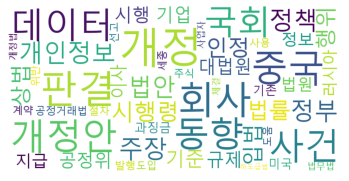

In [12]:
# WordCloud 객체에 전달할 폰트주소 생성
font_path = 'c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(
    font_path = font_path,
    max_font_size = 100, # 최대 폰트 크기
    width = 800, # 이미지 너비
    height = 400, # 이미지 높이
    background_color='white', # 이미지 배경색
    max_words=50) # 최대 단어 수

# 원문이 아닌 형태소 분석 결과로부터 워드 클라우드 생성
wordcloud.generate_from_frequencies(token_word_count1)
wordcloud.to_file('세종.png') # 생성한 이미지를 파일로 저장
plt.axis("off")
plt.imshow(wordcloud)
plt.show()

### 단어 분포 탐색

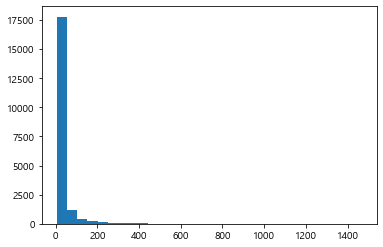

In [13]:
plt.hist(list(token_word_count1.values()), bins=30)
plt.show()